In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('advertising.csv')
df

,Id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head(10)

,Id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()

Id           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.describe()

,Id,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.corr()

,Id,TV,radio,newspaper,sales
Id,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

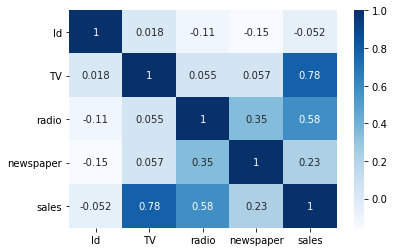

In [9]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

# EDA

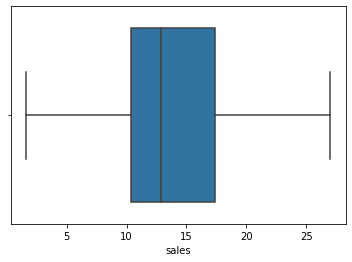

In [10]:
sns.boxplot(df['sales'])
plt.show()

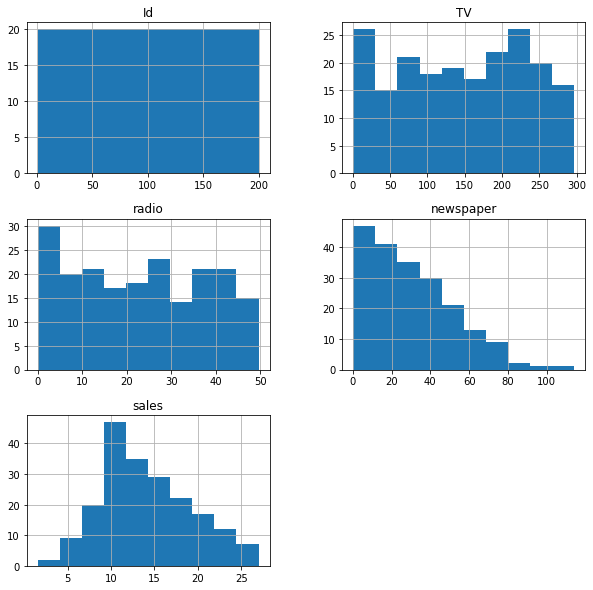

In [11]:

df.hist( bins = 10, figsize = (10,10))
plt.show()

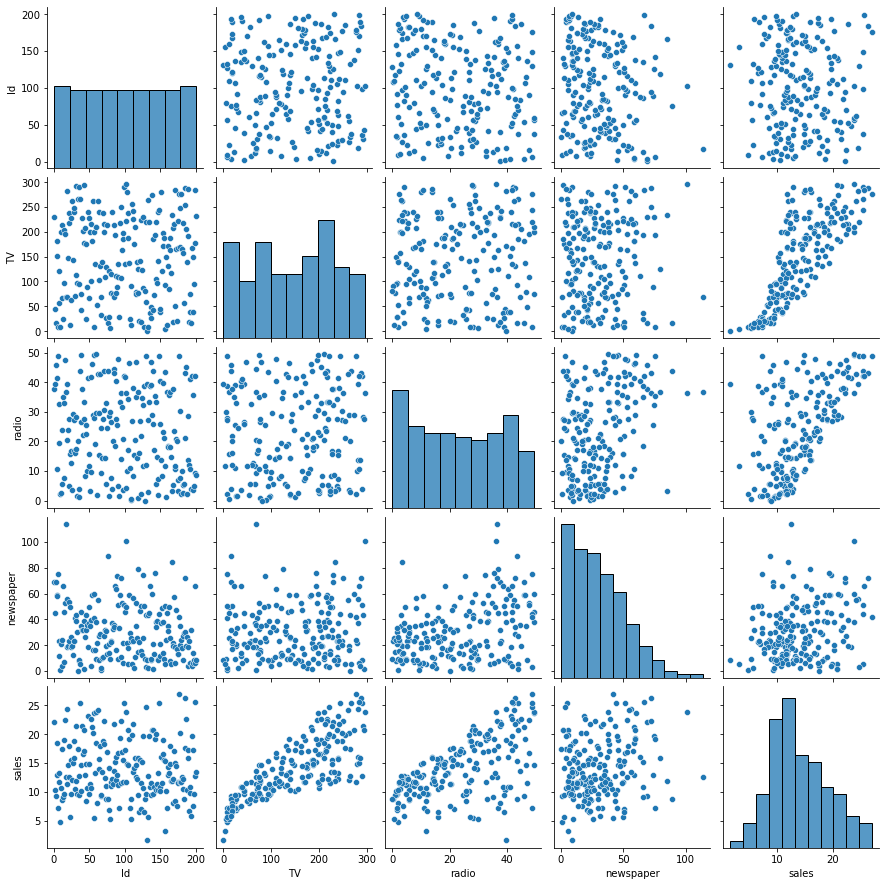

In [12]:
sns.pairplot(df, size=2.5)
plt.show()

# Outliers checking

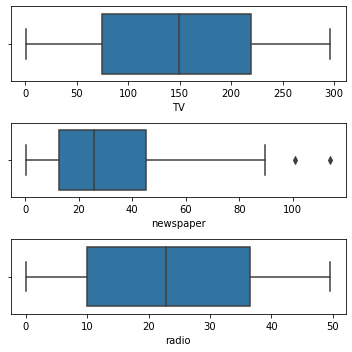

In [13]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

#no outliers in this data

In [14]:
df.drop('Id',axis=1,inplace=True)

In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
df.shape

(200, 4)

In [17]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
features=df.drop("sales",axis=1)
target=df["sales"]

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [20]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.9067114990146383
At random state 0, the training academy is:-0.8601145185017867


At random state 1, the training academy is:-0.8959372632325174
At random state 1, the training academy is:-0.8927605914615385


At random state 2, the training academy is:-0.9151707412454462
At random state 2, the training academy is:-0.7575894500772719


At random state 3, the training academy is:-0.8930288385772915
At random state 3, the training academy is:-0.9138375011080567


At random state 4, the training academy is:-0.8911672911176578
At random state 4, the training academy is:-0.9085774752313166


At random state 5, the training academy is:-0.8956962280033929
At random state 5, the training academy is:-0.8984204533332627


At random state 6, the training academy is:-0.8915418760966582
At random state 6, the training academy is:-0.9224333473922028


At random state 7, the training academy is:-0.8929164670647455
At random state 7, the training academy i

In [21]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=33)

In [32]:
lr.fit(features_train,target_train)

LinearRegression()

In [22]:
pred_test=lr.predict(features_test)

In [23]:
print(r2_score(target_test,pred_test))

0.9066105614268808


In [24]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.8908473589845056 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold3 the cv score is 0.8916464591145559 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold4 the cv score is 0.8900070660549506 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold5 the cv score is 0.8871063495438436 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold6 the cv score is 0.8899208882186671 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold7 the cv score is 0.8859930219823539 and accuracy score for training is -0.8319285003228101and accuracy for the testing is 0.9066105614268808


At cross fold8 the cv score is 0.8826686689919152 and accu

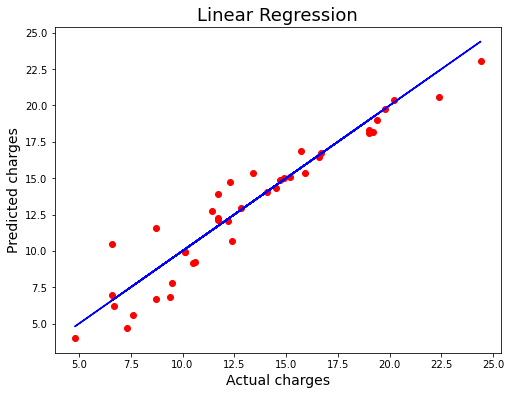

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [28]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.8973903971747603

In [29]:
cv_score=cross_val_score(ls,features,target,cv=3)
cv_mean=cv_score.mean()
cv_mean

0.8922617838869119

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [31]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.6210874058013
Cross Val Score: 97.52649752015569


In [32]:
import pickle
filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))